<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Ibai Ceberio Basañez  <br>
Fecha: 30/05/2022

# Importación de librerias necesarias

# Parte I. Regresión

In [29]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import shap

## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/ibai4119/Laboratorio_2/main/winequality-red.csv'
dataset = pd.read_csv(url)

## Descripción de la fuente del Dataset

El dataset está relacionado con el variante tinto del "Vinho Verde" portugués.

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Problema a resolver.

En el dataset importado podemos encontrar datos que nos permiten determinar la calidad del vino tinto. Tenemos 11 variables de entrada que combinandose unos con otros nos devuelven una puntuación de calidad, nuestra variable de salida. Cabe destacar que esta variable es una puntuación númerica continua que puede ir desde el 0 hasta el 10.

## Caracterización del Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


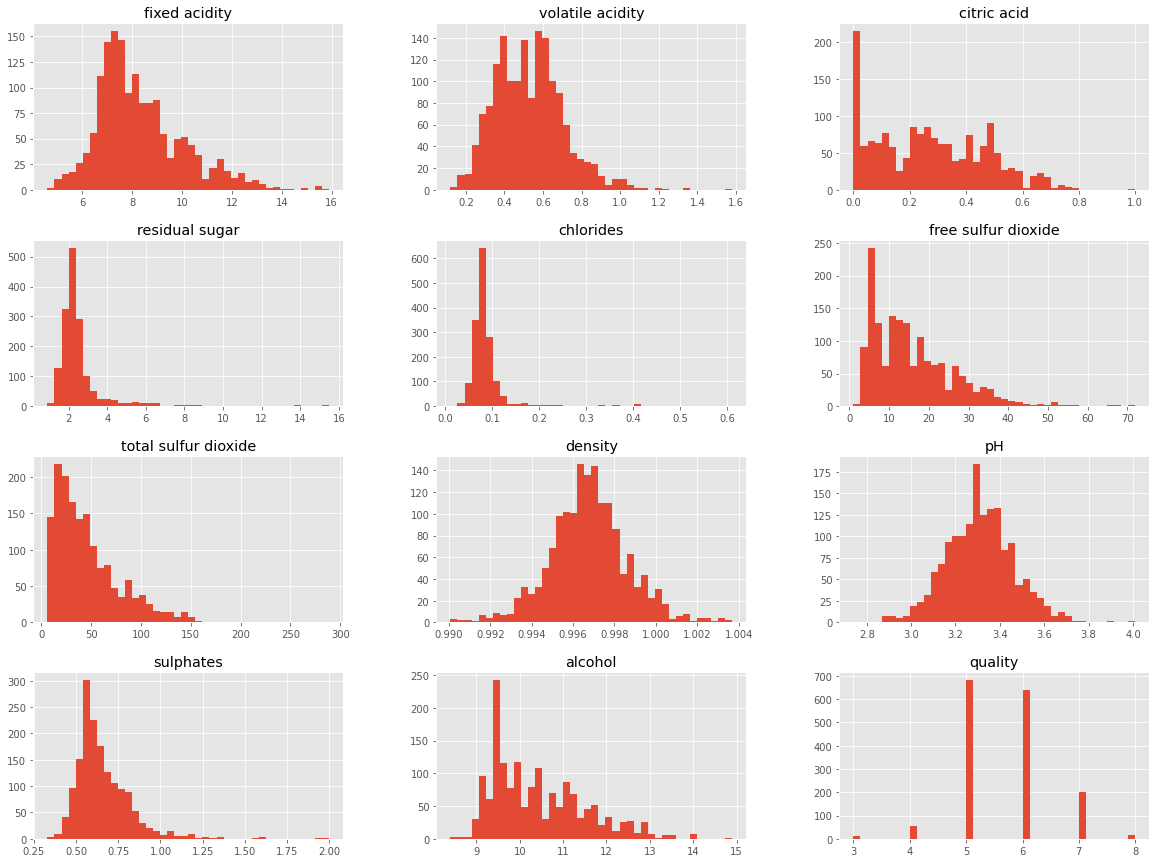

In [6]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,15)
dataset.hist( bins = 40)
plt.show()

Comenzamos por dibujar un histograma que nos permite conocer mejor los datos con los que estamos trabajando. En este caso vemos que hay ciertas variables que poseen distribuciones normales mientras que otras no varían demasiado.

Del mismo modo, vemos que nuestra variable de salida posee 6 valores distintos solamente por lo que también podría considerarse como un problema de clasificación.

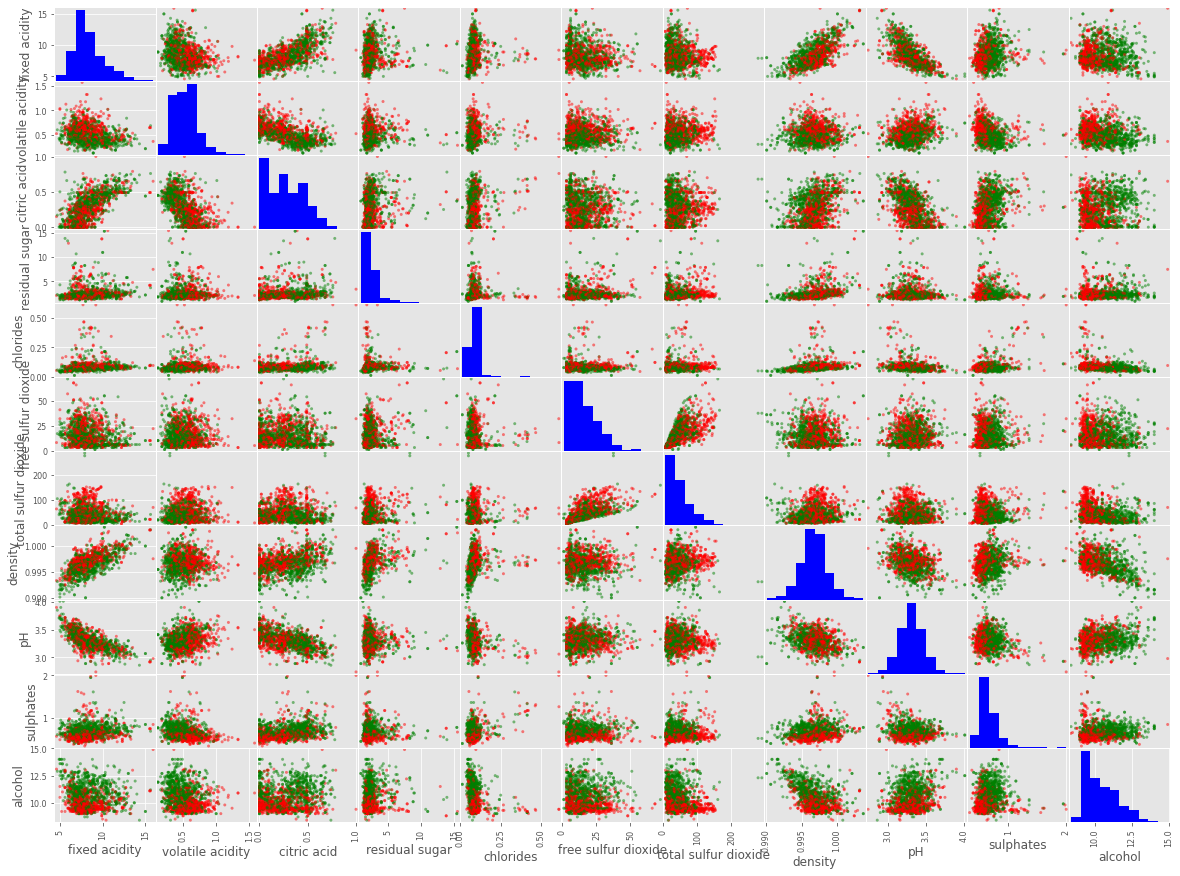

In [7]:
scatter_matrix(dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']], hist_kwds={'color':'blue'}, color=['red' if v <= 5 else 'orange' if v == 5 else 'green' for v in dataset['quality']])
plt.rcParams["figure.figsize"] = (45,25)
plt.show()

Después, hemos dibujado una matriz de puntos. Este tipo de matrices nos permiten observar si existe algún tipo de correlación entre las distintas columnas del dataset.

Hemos creado una función mediante colores y hemos dividido la calidad del vino en 3 grandes bloques. En verde tendríamos los vinos con mayor puntuación que 5, en naranja aquellos con una puntuación de 5 y finalmente en rojo aquellos por debajo de 5. 

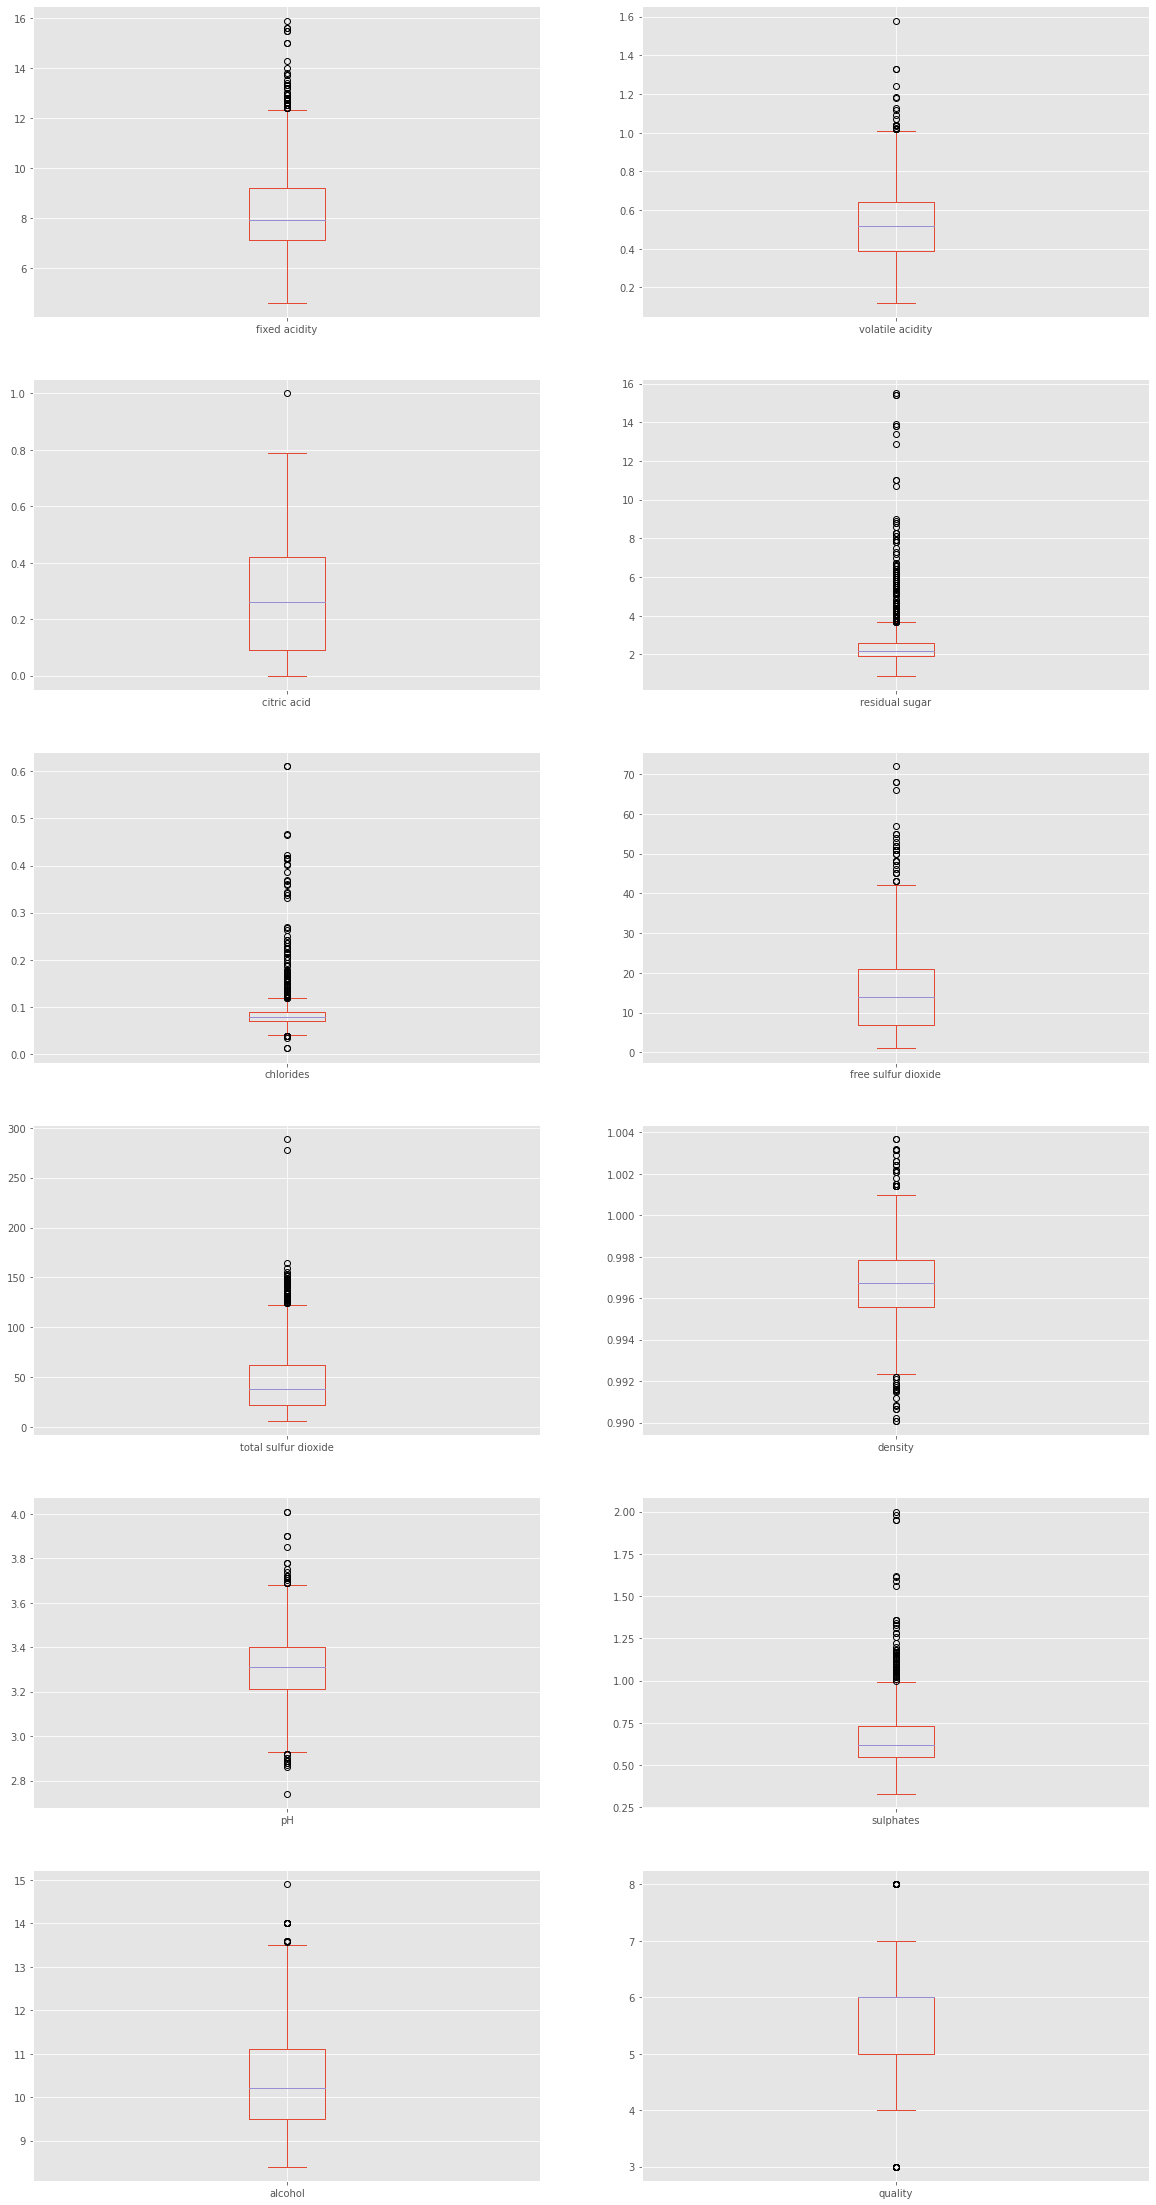

In [8]:
plt.rcParams["figure.figsize"] = (20,40)
dataset.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

Para comprobar cada columna por separado hemos creado estos diagramas de cajas. Gracias a estos gráficos podemos ver si hay dentro de la propia columna valores fuera de los común. Estos son conocidos también como outliers.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

Haciendo uso de los datos obtenidos anteriormentee procederemos a limpiar los datos de outliers.

Para conseguir esto se ha utilizado el valor IQR. Esto se refiere al rango intercuartílico. Esta es la diferencia entre el tercer y el primer cuartil de una distribución.

In [9]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1

dataset_cleared_iqr = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset_cleared_iqr.shape)
print(dataset.shape)

(1179, 12)
(1599, 12)


Si volvemos a dibujar las cajas veremos que donde antes había muchos outliers ahora hay menos y consecuentemente los datos restantes se encuentran en su gran mayoria dentro de la media. Del mismo modo, vemos que hemos limpiado 420 líneas del dataset.

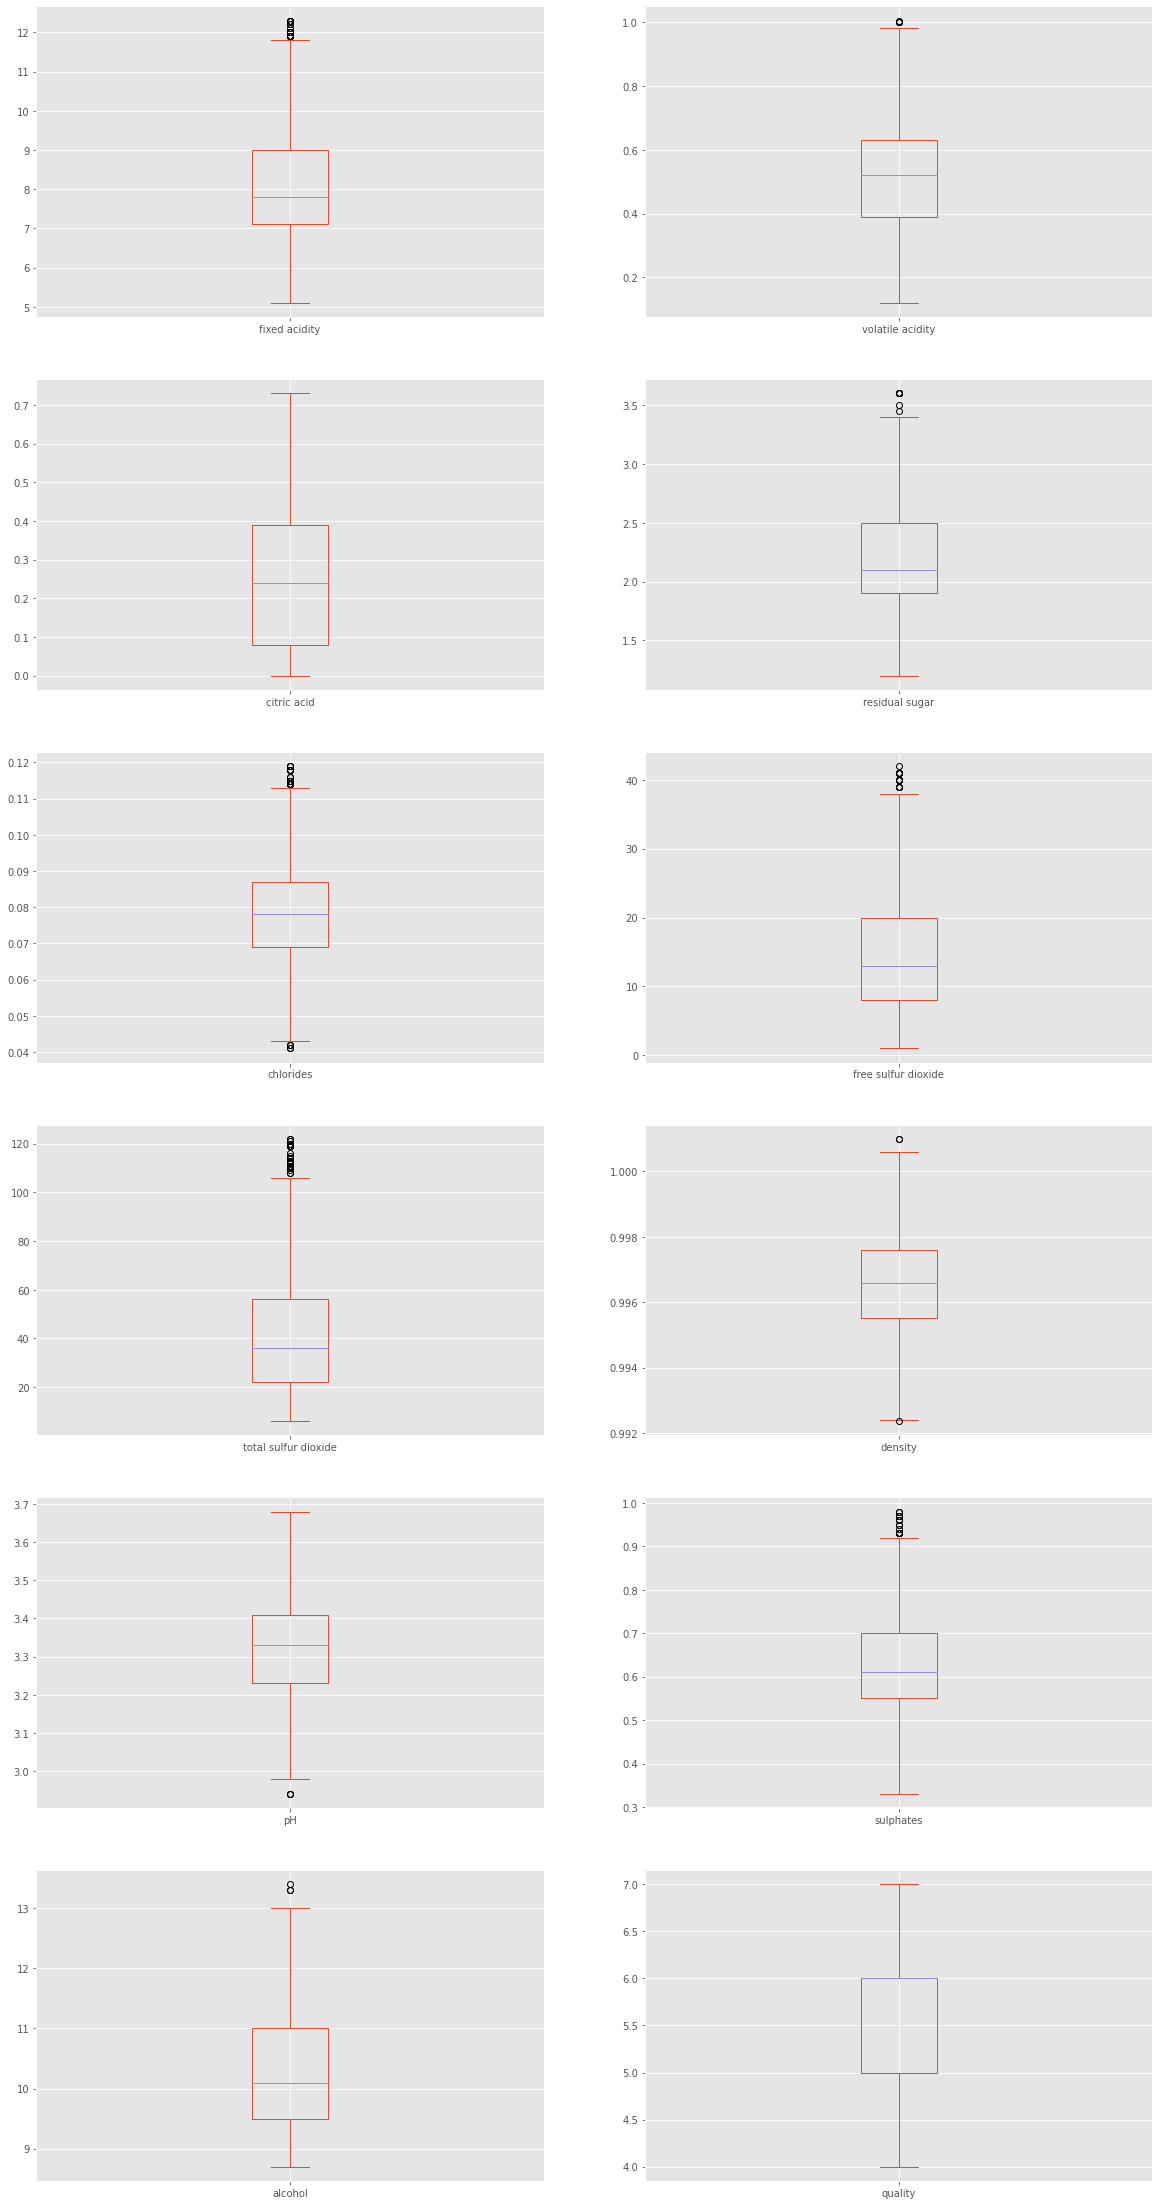

In [10]:
plt.rcParams["figure.figsize"] = (20,40)
dataset_cleared_iqr.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

Como no tenemos variables categóricas no hace falta hacer ninguna codificación.

## División del dataset en datos de entrenamiento y datos de test

In [11]:
dataset_cleared_iqr.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Se ha dividido el dataset en un 80% de entrenamiento y un 20% de test.

Para asegurar la convergencia, es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin normalización de características, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [12]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
features = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates',
    'alcohol'
]
X = dataset_cleared_iqr.loc[:, features]
y = dataset_cleared_iqr[['quality']]

normed_X_data = normalize(X)
normed_y_data = normalize(y)

X_train, X_test, y_train, y_test = train_test_split(normed_X_data, normed_y_data, random_state=0, train_size = .8)


## Propuesta de arquitectura de red neuronal

En keras, un callback es una función que nos permite parar el entrenamiento de un modelo en cualquier momento. Cuando utilizamos early stopping, podemos elegir una cantidad grande de epochs, más de los que necesitamos.

##  Ajuste de modelo de Regresión RNA

Podemos añadir capas de dropout para corregir el overfitting. Si dejamos caer una fracción de la capa en cada paso del entrenamiento conseguimos que sea mucho más complicado que el modelo aprenda patrones inadecuados y obligamos al modelo a buscar los patrones más generales. Estos patrones suelen tener pesos mayores.

In [13]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    return model

In [14]:
#Defining callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=50, # how many epochs to wait before stopping
    min_delta=0.001, # minimium amount of change to count as an improvement
    restore_best_weights=True,
)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,
)

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

## Evaluación de modelo RNA



### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

Minimum Validation Loss: 0.0038
Minimum Validation MAE (mean absolute error): 0.0613


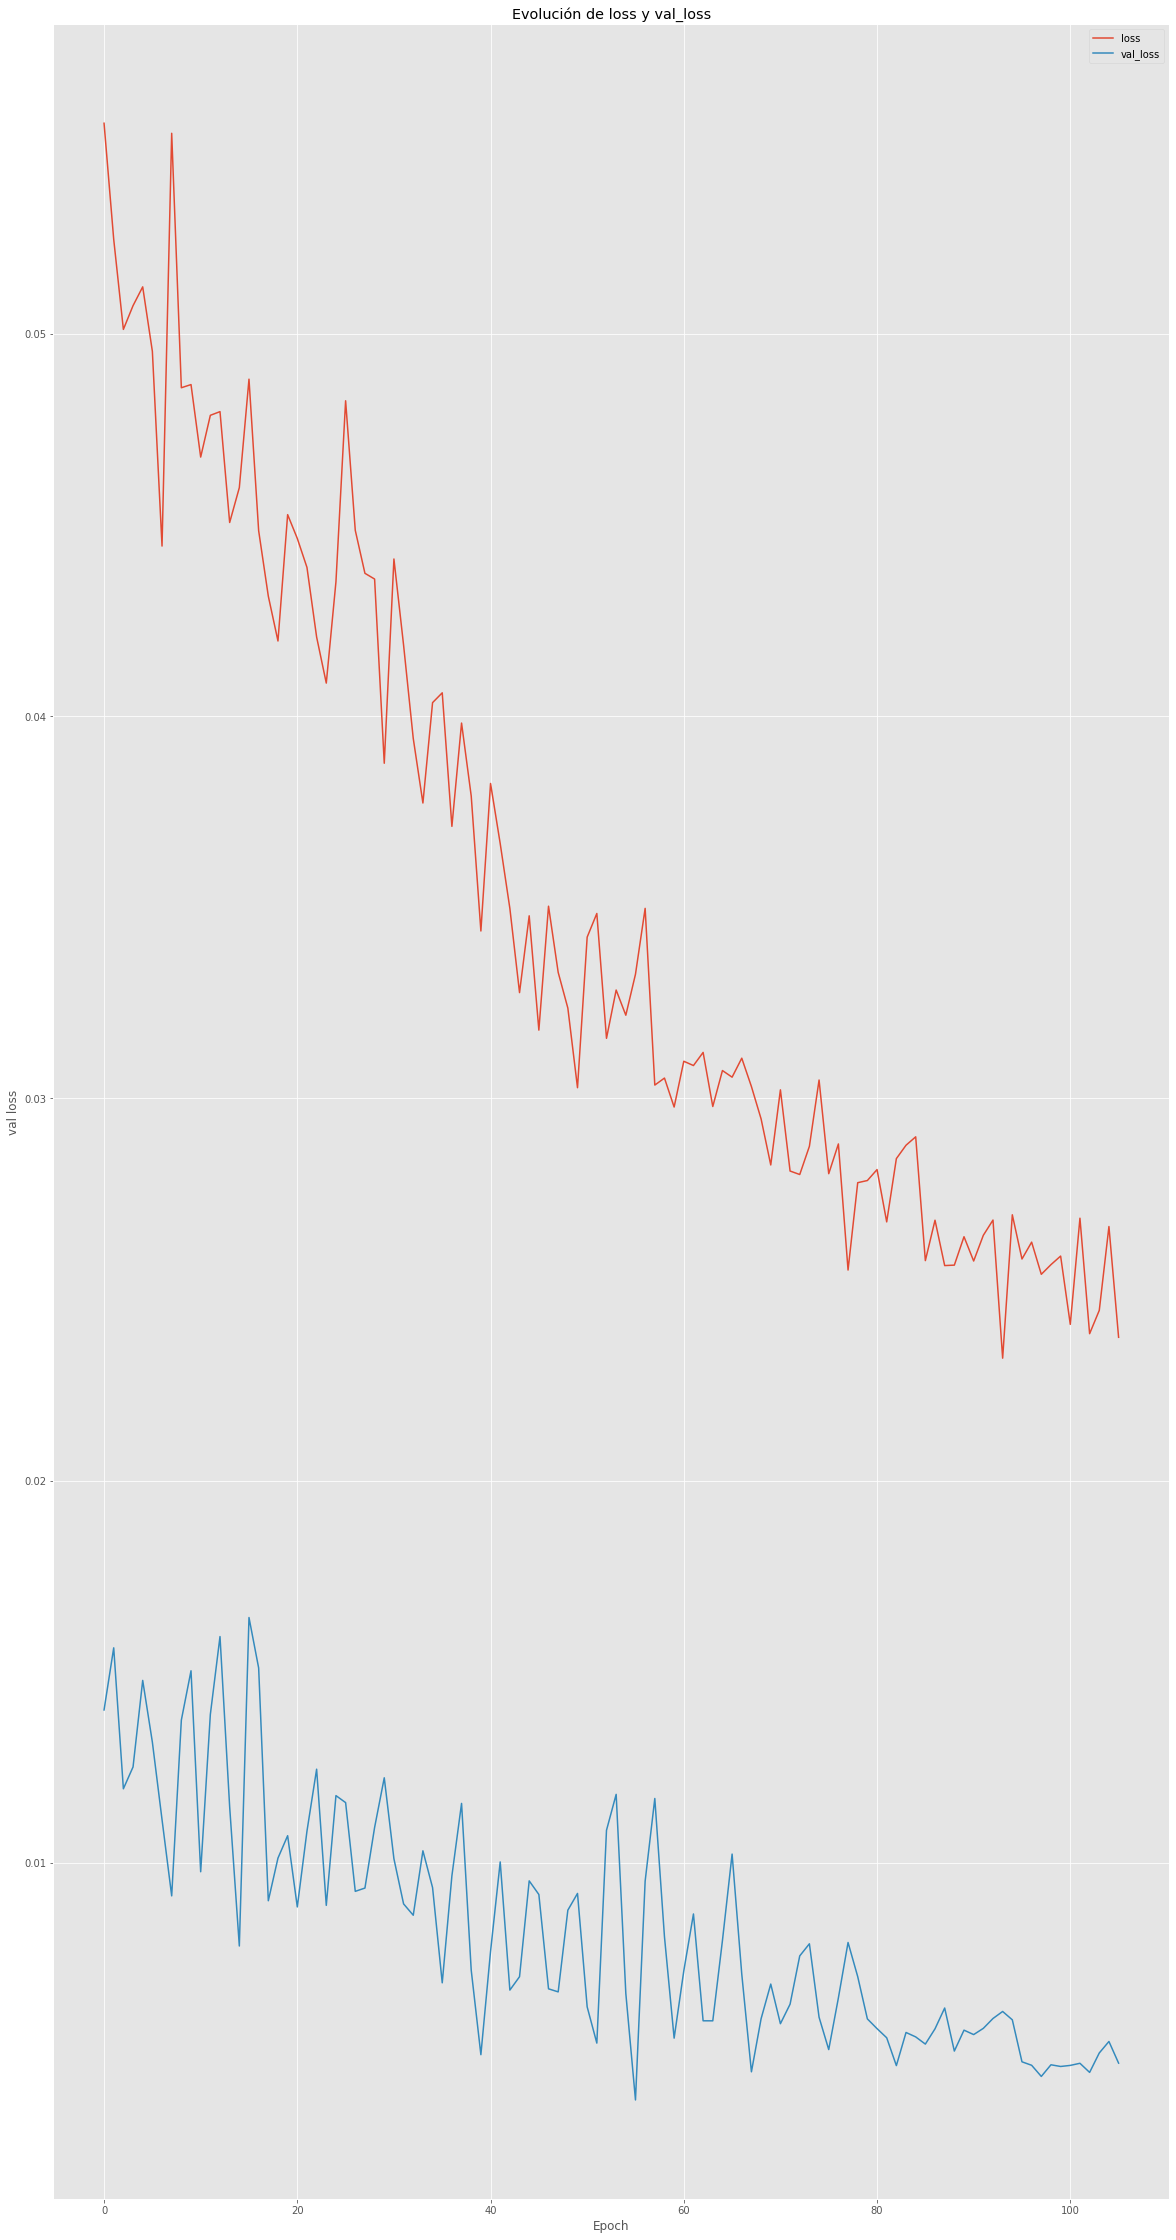

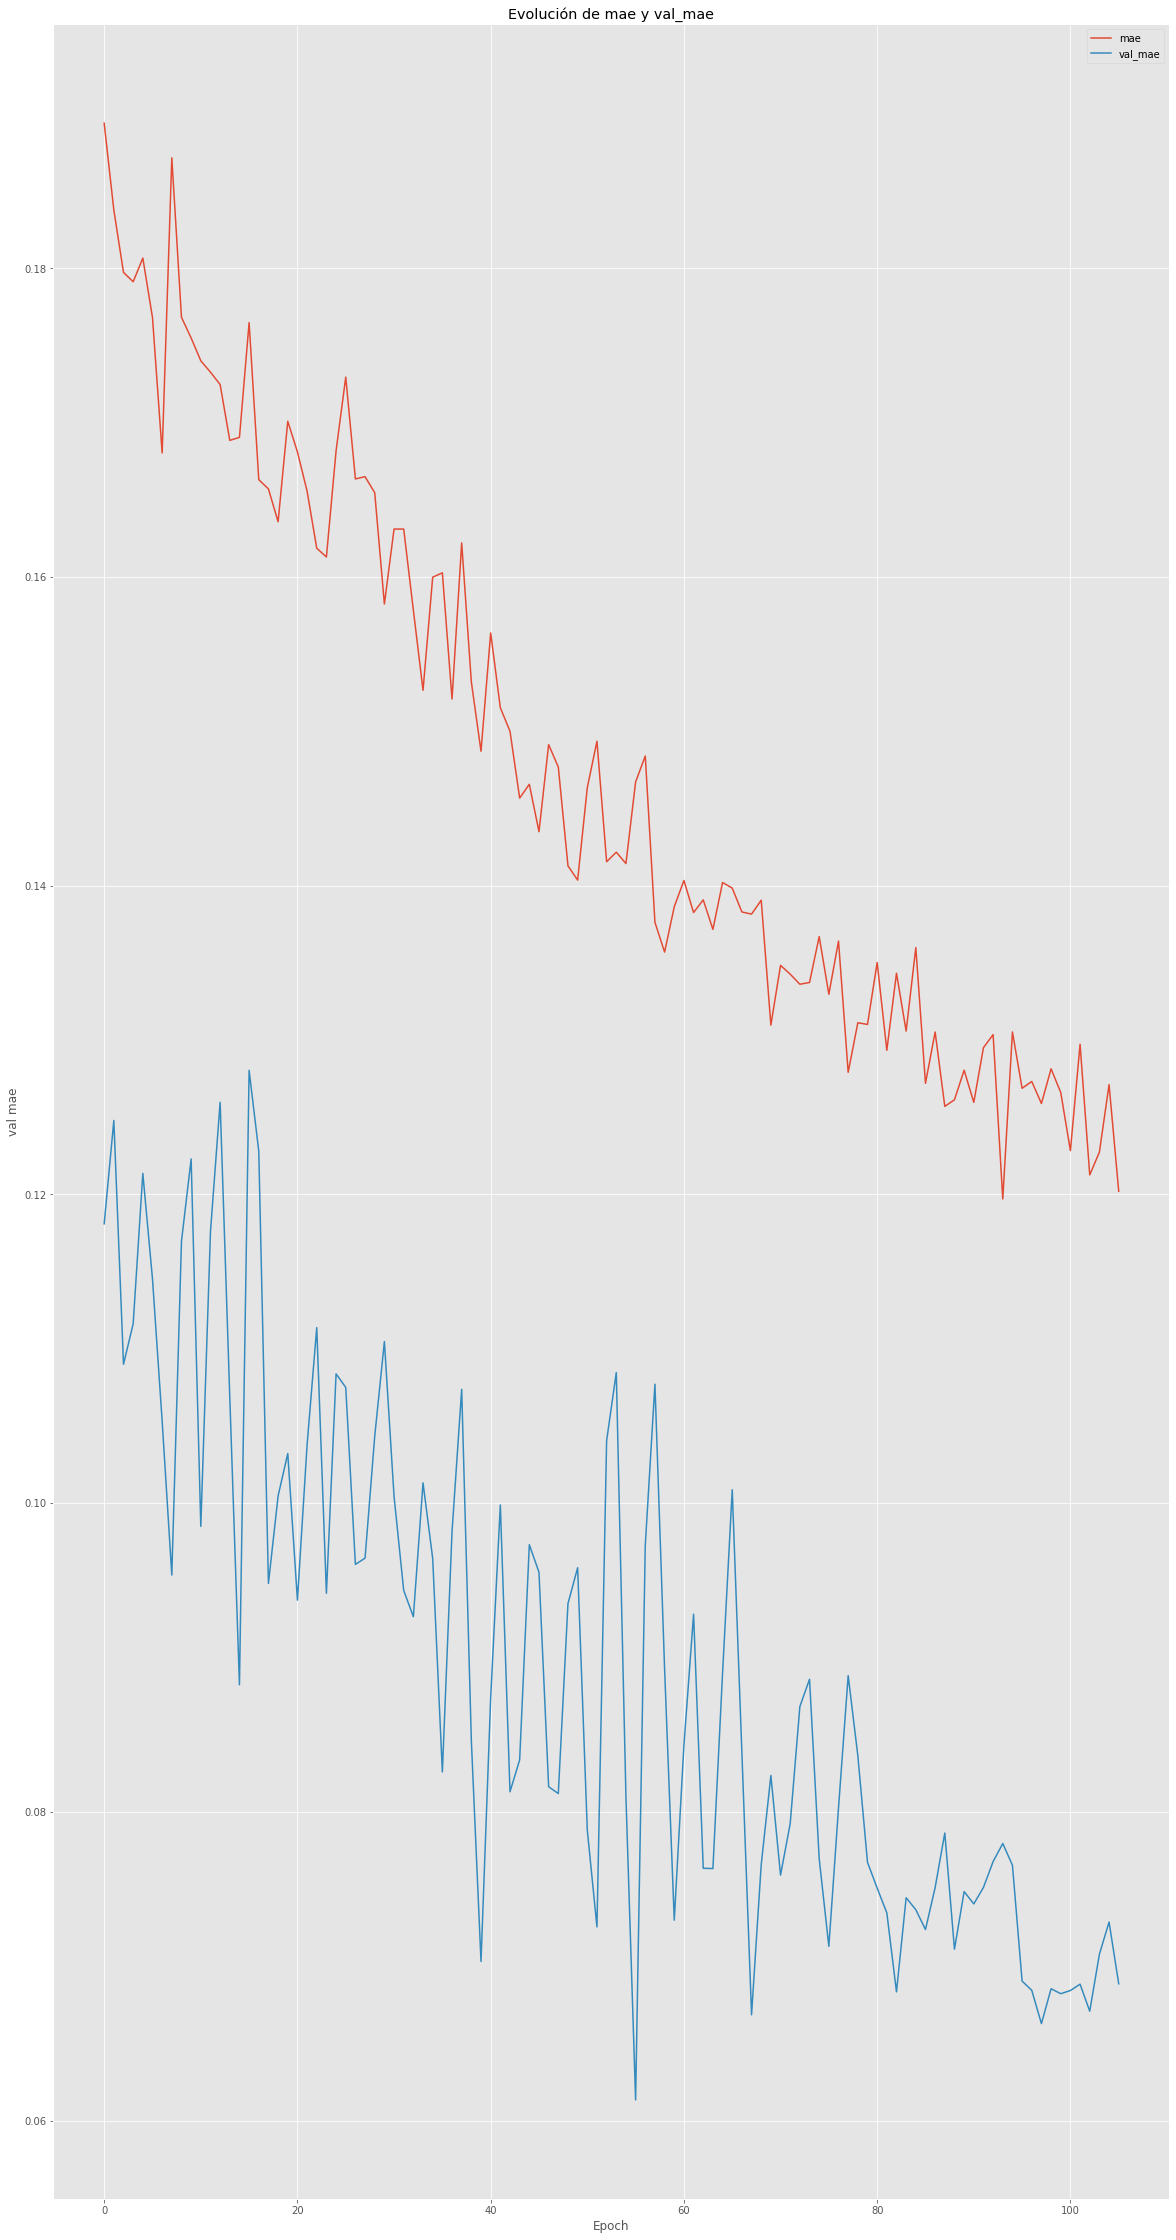

In [24]:
# Training config
EPOCHS = 3000
BATCH_SIZE = 2 ** 8 #256

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_schedule],
    verbose=0, # suppress output since we'll plot the curves
)

# Convert the training history to a dataframe
history_frame = pd.DataFrame(history.history)

# Plot training history
history_frame.loc[0:, ['loss', 'val_loss']].plot()
plt.ylabel('val loss')
plt.xlabel('Epoch')
plt.title('Evolución de loss y val_loss')
history_frame.loc[0:, ['mae', 'val_mae']].plot()
plt.ylabel('val mae')
plt.xlabel('Epoch')
plt.title('Evolución de mae y val_mae')

print("Minimum Validation Loss: {:0.4f}".format(history_frame['val_loss'].min()));
print("Minimum Validation MAE (mean absolute error): {:0.4f}".format(history_frame['val_mae'].min()))


### Evalúe los resultados  para el conjunto de test.

In [16]:
# Making predictions from test set
predictions = model.predict(X_test)

# Evaluate
model_score = mean_absolute_error(y_test, predictions)
print("Final model score (MAE):", model_score)

8/8 [==============================] - 0s 3ms/step
Final model score (MAE): 0.021768186809652944


## Ajuste de modelos de Regresión alternativos

En esta ocasión se ha optado por un modelo de regresion lineal multivarial.

In [31]:
regresor = LinearRegression()
regresor.fit(X_train, y_train)

y_pred = regresor.predict(X_test)
print('Final model score (MAE): ',mean_absolute_error(y_test, y_pred))
print('Final model score (accuracy): ', r2_score(y_test, y_pred))

Final model score (MAE):  0.0
Final model score (accuracy):  1.0


Podemos utilizar eliminación inversa para quedarnos con las variables más importantes solo.

In [18]:
['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [19]:
#Building the optimal model using Backward Elimination

X=np.append(arr = np.ones((1179,1)).astype(int), values = X, axis=1)
X_opt=X[:,[0,1,2,3,4,7,9]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.54e-39
Time:                        16:12:37   Log-Likelihood:                -1189.4
No. Observations:                1179   AIC:                             2393.
Df Residuals:                    1172   BIC:                             2428.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8528      0.791      7.399      0.000       4.301       7.405
x1             0.0071      0.023      0.308      0.758      -0.038       0.052
x2            -1.4679      0.159     -9.215      0.000      -1.780      -1.155
x3            -0.0051      0.186     -0.028      0.978      -0.370       0.360
x4             0.0886      0.047      1.875      0.061      -0.004       0.181
x5            -0.0050      0.001     -6.395      0.000      -0.007      -0.003
x6             0.1502      0.205      0.731      0.465      -0.253       0.553
==============================================================================
Omnibus:                        5.827   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.411
Skew:                           0.120   Prob(JB):                       0.0668
Kurtosis:                       2.770   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Place data into DataFrame for readability
X_test_frame = pd.DataFrame(X_test)
X_test_frame.columns = ['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns = ['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]

# Summarize the training set to accelerate analysis
X_train_frame = shap.kmeans(X_train_frame.values, 25)

# Instantiate an explainer with the model predictions and training data (or training data summary)
explainer = shap.KernelExplainer(model.predict, X_train_frame)

1/1 [==============================] - 0s 12ms/step


  0%|          | 0/236 [00:00<?, ?it/s]

1599/1599 [==============================] - 1s 365us/step


  0%|          | 1/236 [00:00<03:23,  1.16it/s]

1599/1599 [==============================] - 0s 300us/step


  1%|          | 2/236 [00:01<03:19,  1.17it/s]

1599/1599 [==============================] - 1s 312us/step


  1%|▏         | 3/236 [00:02<03:10,  1.22it/s]

1599/1599 [==============================] - 0s 300us/step


  2%|▏         | 4/236 [00:03<03:06,  1.24it/s]

1599/1599 [==============================] - 0s 299us/step


  2%|▏         | 5/236 [00:04<03:03,  1.26it/s]

1599/1599 [==============================] - 0s 306us/step


  3%|▎         | 6/236 [00:04<03:01,  1.27it/s]

1599/1599 [==============================] - 1s 314us/step


  3%|▎         | 7/236 [00:05<02:58,  1.28it/s]

1599/1599 [==============================] - 1s 322us/step


  3%|▎         | 8/236 [00:06<02:56,  1.29it/s]

1599/1599 [==============================] - 1s 311us/step


  4%|▍         | 9/236 [00:07<02:54,  1.30it/s]

1599/1599 [==============================] - 0s 288us/step


  4%|▍         | 10/236 [00:07<02:55,  1.29it/s]

1599/1599 [==============================] - 1s 313us/step


  5%|▍         | 11/236 [00:08<02:54,  1.29it/s]

1599/1599 [==============================] - 1s 340us/step


  5%|▌         | 12/236 [00:09<02:56,  1.27it/s]

1599/1599 [==============================] - 1s 311us/step


  6%|▌         | 13/236 [00:10<02:55,  1.27it/s]

1599/1599 [==============================] - 1s 308us/step


  6%|▌         | 14/236 [00:11<02:53,  1.28it/s]

1599/1599 [==============================] - 0s 307us/step


  6%|▋         | 15/236 [00:11<02:51,  1.29it/s]

1599/1599 [==============================] - 1s 353us/step


  7%|▋         | 16/236 [00:12<02:55,  1.25it/s]

1599/1599 [==============================] - 1s 312us/step


  7%|▋         | 17/236 [00:13<02:54,  1.26it/s]

1599/1599 [==============================] - 1s 311us/step


  8%|▊         | 18/236 [00:14<02:51,  1.27it/s]

1599/1599 [==============================] - 1s 332us/step


  8%|▊         | 19/236 [00:14<02:50,  1.27it/s]

1599/1599 [==============================] - 1s 329us/step


  8%|▊         | 20/236 [00:15<02:52,  1.25it/s]

1599/1599 [==============================] - 1s 315us/step


  9%|▉         | 21/236 [00:16<02:50,  1.26it/s]

1599/1599 [==============================] - 1s 320us/step


  9%|▉         | 22/236 [00:17<02:47,  1.28it/s]

1599/1599 [==============================] - 1s 304us/step


 10%|▉         | 23/236 [00:18<02:46,  1.28it/s]

1599/1599 [==============================] - 1s 321us/step


 10%|█         | 24/236 [00:18<02:49,  1.25it/s]

1599/1599 [==============================] - 0s 306us/step


 11%|█         | 25/236 [00:19<02:47,  1.26it/s]

1599/1599 [==============================] - 0s 292us/step


 11%|█         | 26/236 [00:20<02:45,  1.27it/s]

1599/1599 [==============================] - 0s 299us/step


 11%|█▏        | 27/236 [00:21<02:44,  1.27it/s]

1599/1599 [==============================] - 1s 321us/step


 12%|█▏        | 28/236 [00:22<02:44,  1.26it/s]

1599/1599 [==============================] - 0s 306us/step


 12%|█▏        | 29/236 [00:22<02:41,  1.28it/s]

1599/1599 [==============================] - 0s 293us/step


 13%|█▎        | 30/236 [00:23<02:41,  1.28it/s]

1599/1599 [==============================] - 1s 317us/step


 13%|█▎        | 31/236 [00:24<02:41,  1.27it/s]

1599/1599 [==============================] - 1s 313us/step


 14%|█▎        | 32/236 [00:25<02:39,  1.28it/s]

1599/1599 [==============================] - 1s 312us/step


 14%|█▍        | 33/236 [00:26<02:37,  1.29it/s]

1599/1599 [==============================] - 0s 288us/step


 14%|█▍        | 34/236 [00:26<02:36,  1.29it/s]

1599/1599 [==============================] - 0s 294us/step


 15%|█▍        | 35/236 [00:27<02:37,  1.28it/s]

1599/1599 [==============================] - 0s 287us/step


 15%|█▌        | 36/236 [00:28<02:38,  1.26it/s]

1599/1599 [==============================] - 0s 308us/step


 16%|█▌        | 37/236 [00:29<02:40,  1.24it/s]

1599/1599 [==============================] - 1s 328us/step


 16%|█▌        | 38/236 [00:30<02:39,  1.24it/s]

1599/1599 [==============================] - 0s 301us/step


 17%|█▋        | 39/236 [00:30<02:37,  1.25it/s]

1599/1599 [==============================] - 0s 288us/step


 17%|█▋        | 40/236 [00:31<02:36,  1.25it/s]

1599/1599 [==============================] - 1s 314us/step


 17%|█▋        | 41/236 [00:32<02:33,  1.27it/s]

1599/1599 [==============================] - 1s 315us/step


 18%|█▊        | 42/236 [00:33<02:31,  1.28it/s]

1599/1599 [==============================] - 0s 295us/step


 18%|█▊        | 43/236 [00:33<02:31,  1.28it/s]

1599/1599 [==============================] - 1s 288us/step


 19%|█▊        | 44/236 [00:34<02:32,  1.26it/s]

1599/1599 [==============================] - 1s 330us/step


 19%|█▉        | 45/236 [00:35<02:35,  1.23it/s]

1599/1599 [==============================] - 1s 324us/step


 19%|█▉        | 46/236 [00:36<02:34,  1.23it/s]

1599/1599 [==============================] - 1s 343us/step


 20%|█▉        | 47/236 [00:37<02:37,  1.20it/s]

1599/1599 [==============================] - 1s 313us/step


 20%|██        | 48/236 [00:38<02:34,  1.22it/s]

1599/1599 [==============================] - 1s 314us/step


 21%|██        | 49/236 [00:38<02:31,  1.23it/s]

1599/1599 [==============================] - 1s 311us/step


 21%|██        | 50/236 [00:39<02:29,  1.24it/s]

1599/1599 [==============================] - 0s 302us/step


 22%|██▏       | 51/236 [00:40<02:28,  1.25it/s]

1599/1599 [==============================] - 0s 302us/step


 22%|██▏       | 52/236 [00:41<02:26,  1.26it/s]

1599/1599 [==============================] - 1s 327us/step


 22%|██▏       | 53/236 [00:42<02:24,  1.26it/s]

1599/1599 [==============================] - 1s 323us/step


 23%|██▎       | 54/236 [00:42<02:23,  1.27it/s]

1599/1599 [==============================] - 0s 306us/step


 23%|██▎       | 55/236 [00:43<02:23,  1.26it/s]

1599/1599 [==============================] - 1s 338us/step


 24%|██▎       | 56/236 [00:44<02:23,  1.25it/s]

1599/1599 [==============================] - 0s 253us/step


 24%|██▍       | 57/236 [00:45<02:27,  1.21it/s]

1599/1599 [==============================] - 0s 301us/step


 25%|██▍       | 58/236 [00:46<02:26,  1.21it/s]

1599/1599 [==============================] - 1s 315us/step


 25%|██▌       | 59/236 [00:47<02:28,  1.19it/s]

1599/1599 [==============================] - 1s 322us/step


 25%|██▌       | 60/236 [00:47<02:24,  1.22it/s]

1599/1599 [==============================] - 1s 312us/step


 26%|██▌       | 61/236 [00:48<02:20,  1.25it/s]

1599/1599 [==============================] - 1s 316us/step


 26%|██▋       | 62/236 [00:49<02:22,  1.22it/s]

1599/1599 [==============================] - 0s 299us/step


 27%|██▋       | 63/236 [00:50<02:19,  1.24it/s]

1599/1599 [==============================] - 1s 410us/step


 27%|██▋       | 64/236 [00:51<02:28,  1.16it/s]

1599/1599 [==============================] - 1s 313us/step


 28%|██▊       | 65/236 [00:51<02:22,  1.20it/s]

1599/1599 [==============================] - 1s 307us/step


 28%|██▊       | 66/236 [00:52<02:18,  1.23it/s]

1599/1599 [==============================] - 1s 515us/step


 28%|██▊       | 67/236 [00:53<02:34,  1.10it/s]

1599/1599 [==============================] - 1s 511us/step


 29%|██▉       | 68/236 [00:54<02:44,  1.02it/s]

1599/1599 [==============================] - 1s 540us/step


 29%|██▉       | 69/236 [00:56<02:54,  1.05s/it]

1599/1599 [==============================] - 1s 374us/step


 30%|██▉       | 70/236 [00:57<02:52,  1.04s/it]

1599/1599 [==============================] - 1s 386us/step


 30%|███       | 71/236 [00:58<02:51,  1.04s/it]

1599/1599 [==============================] - 1s 436us/step


 31%|███       | 72/236 [00:59<02:50,  1.04s/it]

1599/1599 [==============================] - 1s 483us/step


 31%|███       | 73/236 [01:00<02:51,  1.05s/it]

1599/1599 [==============================] - 1s 389us/step


 31%|███▏      | 74/236 [01:01<02:47,  1.03s/it]

1599/1599 [==============================] - 1s 444us/step


 32%|███▏      | 75/236 [01:02<02:47,  1.04s/it]

1599/1599 [==============================] - 1s 481us/step


 32%|███▏      | 76/236 [01:03<02:47,  1.04s/it]

1599/1599 [==============================] - 1s 457us/step


 33%|███▎      | 77/236 [01:04<02:49,  1.06s/it]

1599/1599 [==============================] - 1s 357us/step


 33%|███▎      | 78/236 [01:05<02:45,  1.05s/it]

1599/1599 [==============================] - 1s 396us/step


 33%|███▎      | 79/236 [01:06<02:43,  1.04s/it]

1599/1599 [==============================] - 1s 385us/step


 34%|███▍      | 80/236 [01:07<02:39,  1.02s/it]

1599/1599 [==============================] - 1s 376us/step


 34%|███▍      | 81/236 [01:08<02:36,  1.01s/it]

1599/1599 [==============================] - 1s 372us/step


 35%|███▍      | 82/236 [01:09<02:37,  1.02s/it]

1599/1599 [==============================] - 1s 399us/step


 35%|███▌      | 83/236 [01:10<02:35,  1.01s/it]

1599/1599 [==============================] - 1s 320us/step


 36%|███▌      | 84/236 [01:11<02:34,  1.01s/it]

1599/1599 [==============================] - 1s 306us/step


 36%|███▌      | 85/236 [01:12<02:27,  1.02it/s]

1599/1599 [==============================] - 1s 362us/step


 36%|███▋      | 86/236 [01:13<02:28,  1.01it/s]

1599/1599 [==============================] - 1s 434us/step


 37%|███▋      | 87/236 [01:14<02:30,  1.01s/it]

1599/1599 [==============================] - 1s 463us/step


 37%|███▋      | 88/236 [01:15<02:32,  1.03s/it]

1599/1599 [==============================] - 1s 489us/step


 38%|███▊      | 89/236 [01:16<02:33,  1.05s/it]

1599/1599 [==============================] - 1s 398us/step


 38%|███▊      | 90/236 [01:17<02:29,  1.02s/it]

1599/1599 [==============================] - 1s 422us/step


 39%|███▊      | 91/236 [01:18<02:29,  1.03s/it]

1599/1599 [==============================] - 1s 419us/step


 39%|███▉      | 92/236 [01:19<02:27,  1.03s/it]

1599/1599 [==============================] - 1s 447us/step


 39%|███▉      | 93/236 [01:20<02:28,  1.04s/it]

1599/1599 [==============================] - 1s 482us/step


 40%|███▉      | 94/236 [01:22<02:32,  1.07s/it]

1599/1599 [==============================] - 1s 377us/step


 40%|████      | 95/236 [01:22<02:26,  1.04s/it]

1599/1599 [==============================] - 1s 439us/step


 41%|████      | 96/236 [01:24<02:27,  1.05s/it]

1599/1599 [==============================] - 1s 426us/step


 41%|████      | 97/236 [01:25<02:22,  1.02s/it]

1599/1599 [==============================] - 1s 404us/step


 42%|████▏     | 98/236 [01:26<02:20,  1.02s/it]

1599/1599 [==============================] - 1s 413us/step


 42%|████▏     | 99/236 [01:27<02:18,  1.01s/it]

1599/1599 [==============================] - 1s 423us/step


 42%|████▏     | 100/236 [01:28<02:20,  1.03s/it]

1599/1599 [==============================] - 1s 347us/step


 43%|████▎     | 101/236 [01:29<02:17,  1.02s/it]

1599/1599 [==============================] - 1s 375us/step


 43%|████▎     | 102/236 [01:30<02:14,  1.01s/it]

1599/1599 [==============================] - 1s 439us/step


 44%|████▎     | 103/236 [01:31<02:16,  1.02s/it]

1599/1599 [==============================] - 1s 397us/step


 44%|████▍     | 104/236 [01:32<02:15,  1.03s/it]

1599/1599 [==============================] - 1s 470us/step


 44%|████▍     | 105/236 [01:33<02:17,  1.05s/it]

1599/1599 [==============================] - 1s 481us/step


 45%|████▍     | 106/236 [01:34<02:17,  1.06s/it]

1599/1599 [==============================] - 1s 395us/step


 45%|████▌     | 107/236 [01:35<02:14,  1.04s/it]

1599/1599 [==============================] - 1s 434us/step


 46%|████▌     | 108/236 [01:36<02:15,  1.06s/it]

1599/1599 [==============================] - 1s 340us/step


 46%|████▌     | 109/236 [01:37<02:09,  1.02s/it]

1599/1599 [==============================] - 1s 458us/step


 47%|████▋     | 110/236 [01:38<02:09,  1.03s/it]

1599/1599 [==============================] - 1s 485us/step


 47%|████▋     | 111/236 [01:39<02:13,  1.07s/it]

1599/1599 [==============================] - 1s 440us/step


 47%|████▋     | 112/236 [01:40<02:13,  1.08s/it]

1599/1599 [==============================] - 1s 426us/step


 48%|████▊     | 113/236 [01:41<02:13,  1.08s/it]

1599/1599 [==============================] - 1s 497us/step


 48%|████▊     | 114/236 [01:42<02:14,  1.10s/it]

1599/1599 [==============================] - 1s 492us/step


 49%|████▊     | 115/236 [01:44<02:16,  1.12s/it]

1599/1599 [==============================] - 1s 529us/step


 49%|████▉     | 116/236 [01:45<02:18,  1.15s/it]

1599/1599 [==============================] - 1s 441us/step


 50%|████▉     | 117/236 [01:46<02:16,  1.15s/it]

1599/1599 [==============================] - 1s 480us/step


 50%|█████     | 118/236 [01:47<02:13,  1.13s/it]

1599/1599 [==============================] - 1s 502us/step


 50%|█████     | 119/236 [01:48<02:11,  1.13s/it]

1599/1599 [==============================] - 1s 475us/step


 51%|█████     | 120/236 [01:49<02:10,  1.12s/it]

1599/1599 [==============================] - 1s 482us/step


 51%|█████▏    | 121/236 [01:50<02:09,  1.13s/it]

1599/1599 [==============================] - 1s 370us/step


 52%|█████▏    | 122/236 [01:51<02:02,  1.08s/it]

1599/1599 [==============================] - 1s 373us/step


 52%|█████▏    | 123/236 [01:52<02:01,  1.07s/it]

1599/1599 [==============================] - 1s 409us/step


 53%|█████▎    | 124/236 [01:53<01:59,  1.07s/it]

1599/1599 [==============================] - 1s 480us/step


 53%|█████▎    | 125/236 [01:55<02:02,  1.11s/it]

1599/1599 [==============================] - 1s 355us/step


 53%|█████▎    | 126/236 [01:56<01:56,  1.06s/it]

1599/1599 [==============================] - 1s 431us/step


 54%|█████▍    | 127/236 [01:57<01:55,  1.06s/it]

1599/1599 [==============================] - 1s 455us/step


 54%|█████▍    | 128/236 [01:58<01:53,  1.05s/it]

1599/1599 [==============================] - 1s 365us/step


 55%|█████▍    | 129/236 [01:59<01:52,  1.05s/it]

1599/1599 [==============================] - 1s 378us/step


 55%|█████▌    | 130/236 [02:00<01:53,  1.07s/it]

1599/1599 [==============================] - 1s 451us/step


 56%|█████▌    | 131/236 [02:01<01:52,  1.07s/it]

1599/1599 [==============================] - 1s 429us/step


 56%|█████▌    | 132/236 [02:02<01:52,  1.08s/it]

1599/1599 [==============================] - 1s 447us/step


 56%|█████▋    | 133/236 [02:03<01:51,  1.08s/it]

1599/1599 [==============================] - 1s 419us/step


 57%|█████▋    | 134/236 [02:04<01:48,  1.06s/it]

1599/1599 [==============================] - 1s 486us/step


 57%|█████▋    | 135/236 [02:05<01:48,  1.07s/it]

1599/1599 [==============================] - 1s 383us/step


 58%|█████▊    | 136/236 [02:06<01:44,  1.05s/it]

1599/1599 [==============================] - 1s 387us/step


 58%|█████▊    | 137/236 [02:07<01:42,  1.04s/it]

1599/1599 [==============================] - 1s 358us/step


 58%|█████▊    | 138/236 [02:08<01:38,  1.01s/it]

1599/1599 [==============================] - 1s 432us/step


 59%|█████▉    | 139/236 [02:09<01:39,  1.03s/it]

1599/1599 [==============================] - 1s 472us/step


 59%|█████▉    | 140/236 [02:10<01:41,  1.06s/it]

1599/1599 [==============================] - 1s 434us/step


 60%|█████▉    | 141/236 [02:11<01:40,  1.06s/it]

1599/1599 [==============================] - 1s 476us/step


 60%|██████    | 142/236 [02:13<01:39,  1.06s/it]

1599/1599 [==============================] - 1s 495us/step


 61%|██████    | 143/236 [02:14<01:39,  1.07s/it]

1599/1599 [==============================] - 1s 505us/step


 61%|██████    | 144/236 [02:15<01:42,  1.11s/it]

1599/1599 [==============================] - 1s 366us/step


 61%|██████▏   | 145/236 [02:16<01:36,  1.07s/it]

1599/1599 [==============================] - 1s 554us/step


 62%|██████▏   | 146/236 [02:17<01:40,  1.12s/it]

1599/1599 [==============================] - 1s 590us/step


 62%|██████▏   | 147/236 [02:18<01:43,  1.16s/it]

1599/1599 [==============================] - 1s 448us/step


 63%|██████▎   | 148/236 [02:19<01:39,  1.13s/it]

1599/1599 [==============================] - 1s 364us/step


 63%|██████▎   | 149/236 [02:20<01:35,  1.10s/it]

1599/1599 [==============================] - 1s 443us/step


 64%|██████▎   | 150/236 [02:22<01:35,  1.11s/it]

1599/1599 [==============================] - 1s 451us/step


 64%|██████▍   | 151/236 [02:23<01:34,  1.12s/it]

1599/1599 [==============================] - 1s 558us/step


 64%|██████▍   | 152/236 [02:24<01:42,  1.22s/it]

1599/1599 [==============================] - 1s 337us/step


 65%|██████▍   | 153/236 [02:25<01:34,  1.14s/it]

1599/1599 [==============================] - 1s 329us/step


 65%|██████▌   | 154/236 [02:26<01:27,  1.06s/it]

1599/1599 [==============================] - 0s 293us/step


 66%|██████▌   | 155/236 [02:27<01:21,  1.01s/it]

1599/1599 [==============================] - 1s 413us/step


 66%|██████▌   | 156/236 [02:28<01:21,  1.02s/it]

1599/1599 [==============================] - 1s 376us/step


 67%|██████▋   | 157/236 [02:29<01:20,  1.02s/it]

1599/1599 [==============================] - 1s 417us/step


 67%|██████▋   | 158/236 [02:30<01:20,  1.04s/it]

1599/1599 [==============================] - 1s 422us/step


 67%|██████▋   | 159/236 [02:31<01:20,  1.04s/it]

1599/1599 [==============================] - 1s 473us/step


 68%|██████▊   | 160/236 [02:32<01:20,  1.06s/it]

1599/1599 [==============================] - 1s 366us/step


 68%|██████▊   | 161/236 [02:33<01:17,  1.04s/it]

1599/1599 [==============================] - 1s 326us/step


 69%|██████▊   | 162/236 [02:34<01:14,  1.00s/it]

1599/1599 [==============================] - 1s 341us/step


 69%|██████▉   | 163/236 [02:35<01:12,  1.00it/s]

1599/1599 [==============================] - 0s 292us/step


 69%|██████▉   | 164/236 [02:36<01:10,  1.02it/s]

1599/1599 [==============================] - 1s 423us/step


 70%|██████▉   | 165/236 [02:37<01:11,  1.00s/it]

1599/1599 [==============================] - 1s 373us/step


 70%|███████   | 166/236 [02:38<01:10,  1.01s/it]

1599/1599 [==============================] - 1s 375us/step


 71%|███████   | 167/236 [02:39<01:10,  1.02s/it]

1599/1599 [==============================] - 1s 361us/step


 71%|███████   | 168/236 [02:40<01:07,  1.00it/s]

1599/1599 [==============================] - 1s 329us/step


 72%|███████▏  | 169/236 [02:41<01:05,  1.02it/s]

1599/1599 [==============================] - 1s 445us/step


 72%|███████▏  | 170/236 [02:42<01:06,  1.01s/it]

1599/1599 [==============================] - 1s 443us/step


 72%|███████▏  | 171/236 [02:43<01:07,  1.04s/it]

1599/1599 [==============================] - 1s 446us/step


 73%|███████▎  | 172/236 [02:44<01:07,  1.06s/it]

1599/1599 [==============================] - 1s 346us/step


 73%|███████▎  | 173/236 [02:45<01:05,  1.04s/it]

1599/1599 [==============================] - 1s 359us/step


 74%|███████▎  | 174/236 [02:46<01:02,  1.02s/it]

1599/1599 [==============================] - 1s 422us/step


 74%|███████▍  | 175/236 [02:47<01:01,  1.01s/it]

1599/1599 [==============================] - 1s 441us/step


 75%|███████▍  | 176/236 [02:48<01:01,  1.03s/it]

1599/1599 [==============================] - 1s 424us/step


 75%|███████▌  | 177/236 [02:49<01:01,  1.04s/it]

1599/1599 [==============================] - 1s 520us/step


 75%|███████▌  | 178/236 [02:50<01:01,  1.07s/it]

1599/1599 [==============================] - 1s 469us/step


 76%|███████▌  | 179/236 [02:52<01:00,  1.07s/it]

1599/1599 [==============================] - 1s 399us/step


 76%|███████▋  | 180/236 [02:53<00:59,  1.06s/it]

1599/1599 [==============================] - 1s 400us/step


 77%|███████▋  | 181/236 [02:54<00:58,  1.06s/it]

1599/1599 [==============================] - 1s 363us/step


 77%|███████▋  | 182/236 [02:55<00:56,  1.04s/it]

1599/1599 [==============================] - 1s 474us/step


 78%|███████▊  | 183/236 [02:56<00:55,  1.04s/it]

1599/1599 [==============================] - 1s 488us/step


 78%|███████▊  | 184/236 [02:57<00:55,  1.06s/it]

1599/1599 [==============================] - 1s 426us/step


 78%|███████▊  | 185/236 [02:58<00:54,  1.06s/it]

1599/1599 [==============================] - 1s 405us/step


 79%|███████▉  | 186/236 [02:59<00:51,  1.04s/it]

1599/1599 [==============================] - 1s 436us/step


 79%|███████▉  | 187/236 [03:00<00:51,  1.05s/it]

1599/1599 [==============================] - 1s 489us/step


 80%|███████▉  | 188/236 [03:01<00:51,  1.06s/it]

1599/1599 [==============================] - 1s 373us/step


 80%|████████  | 189/236 [03:02<00:49,  1.05s/it]

1599/1599 [==============================] - 1s 371us/step


 81%|████████  | 190/236 [03:03<00:47,  1.04s/it]

1599/1599 [==============================] - 1s 392us/step


 81%|████████  | 191/236 [03:04<00:46,  1.03s/it]

1599/1599 [==============================] - 1s 333us/step


 81%|████████▏ | 192/236 [03:05<00:45,  1.03s/it]

1599/1599 [==============================] - 1s 316us/step


 82%|████████▏ | 193/236 [03:06<00:42,  1.01it/s]

1599/1599 [==============================] - 1s 301us/step


 82%|████████▏ | 194/236 [03:07<00:40,  1.05it/s]

1599/1599 [==============================] - 1s 409us/step


 83%|████████▎ | 195/236 [03:08<00:39,  1.03it/s]

1599/1599 [==============================] - 1s 434us/step


 83%|████████▎ | 196/236 [03:09<00:39,  1.00it/s]

1599/1599 [==============================] - 1s 415us/step


 83%|████████▎ | 197/236 [03:10<00:39,  1.01s/it]

1599/1599 [==============================] - 1s 427us/step


 84%|████████▍ | 198/236 [03:11<00:38,  1.02s/it]

1599/1599 [==============================] - 1s 443us/step


 84%|████████▍ | 199/236 [03:12<00:37,  1.01s/it]

1599/1599 [==============================] - 1s 395us/step


 85%|████████▍ | 200/236 [03:13<00:36,  1.01s/it]

1599/1599 [==============================] - 1s 440us/step


 85%|████████▌ | 201/236 [03:14<00:35,  1.03s/it]

1599/1599 [==============================] - 1s 458us/step


 86%|████████▌ | 202/236 [03:15<00:35,  1.05s/it]

1599/1599 [==============================] - 1s 336us/step


 86%|████████▌ | 203/236 [03:16<00:33,  1.03s/it]

1599/1599 [==============================] - 1s 358us/step


 86%|████████▋ | 204/236 [03:17<00:32,  1.00s/it]

1599/1599 [==============================] - 1s 370us/step


 87%|████████▋ | 205/236 [03:18<00:30,  1.00it/s]

1599/1599 [==============================] - 1s 396us/step


 87%|████████▋ | 206/236 [03:19<00:31,  1.04s/it]

1599/1599 [==============================] - 1s 397us/step


 88%|████████▊ | 207/236 [03:20<00:29,  1.03s/it]

1599/1599 [==============================] - 1s 438us/step


 88%|████████▊ | 208/236 [03:21<00:29,  1.05s/it]

1599/1599 [==============================] - 1s 410us/step


 89%|████████▊ | 209/236 [03:22<00:28,  1.06s/it]

1599/1599 [==============================] - 1s 396us/step


 89%|████████▉ | 210/236 [03:24<00:27,  1.07s/it]

1599/1599 [==============================] - 1s 367us/step


 89%|████████▉ | 211/236 [03:25<00:26,  1.06s/it]

1599/1599 [==============================] - 1s 456us/step


 90%|████████▉ | 212/236 [03:26<00:25,  1.08s/it]

1599/1599 [==============================] - 1s 340us/step


 90%|█████████ | 213/236 [03:27<00:24,  1.04s/it]

1599/1599 [==============================] - 1s 344us/step


 91%|█████████ | 214/236 [03:28<00:22,  1.02s/it]

1599/1599 [==============================] - 1s 382us/step


 91%|█████████ | 215/236 [03:29<00:21,  1.03s/it]

1599/1599 [==============================] - 1s 400us/step


 92%|█████████▏| 216/236 [03:30<00:20,  1.03s/it]

1599/1599 [==============================] - 1s 485us/step


 92%|█████████▏| 217/236 [03:31<00:19,  1.04s/it]

1599/1599 [==============================] - 1s 443us/step


 92%|█████████▏| 218/236 [03:32<00:19,  1.06s/it]

1599/1599 [==============================] - 1s 376us/step


 93%|█████████▎| 219/236 [03:33<00:17,  1.05s/it]

1599/1599 [==============================] - 1s 383us/step


 93%|█████████▎| 220/236 [03:34<00:16,  1.03s/it]

1599/1599 [==============================] - 1s 372us/step


 94%|█████████▎| 221/236 [03:35<00:15,  1.02s/it]

1599/1599 [==============================] - 1s 372us/step


 94%|█████████▍| 222/236 [03:36<00:14,  1.03s/it]

1599/1599 [==============================] - 1s 391us/step


 94%|█████████▍| 223/236 [03:37<00:13,  1.03s/it]

1599/1599 [==============================] - 1s 392us/step


 95%|█████████▍| 224/236 [03:38<00:12,  1.01s/it]

1599/1599 [==============================] - 1s 493us/step


 95%|█████████▌| 225/236 [03:39<00:11,  1.04s/it]

1599/1599 [==============================] - 1s 375us/step


 96%|█████████▌| 226/236 [03:40<00:10,  1.03s/it]

1599/1599 [==============================] - 1s 371us/step


 96%|█████████▌| 227/236 [03:41<00:09,  1.02s/it]

1599/1599 [==============================] - 1s 463us/step


 97%|█████████▋| 228/236 [03:42<00:08,  1.04s/it]

1599/1599 [==============================] - 1s 402us/step


 97%|█████████▋| 229/236 [03:43<00:07,  1.05s/it]

1599/1599 [==============================] - 1s 477us/step


 97%|█████████▋| 230/236 [03:44<00:06,  1.07s/it]

1599/1599 [==============================] - 1s 484us/step


 98%|█████████▊| 231/236 [03:45<00:05,  1.08s/it]

1599/1599 [==============================] - 1s 391us/step


 98%|█████████▊| 232/236 [03:46<00:04,  1.05s/it]

1599/1599 [==============================] - 1s 371us/step


 99%|█████████▊| 233/236 [03:47<00:03,  1.03s/it]

1599/1599 [==============================] - 1s 396us/step


 99%|█████████▉| 234/236 [03:48<00:02,  1.04s/it]

1599/1599 [==============================] - 1s 348us/step


100%|█████████▉| 235/236 [03:50<00:01,  1.08s/it]

1599/1599 [==============================] - 1s 299us/step


100%|██████████| 236/236 [03:51<00:00,  1.02it/s]


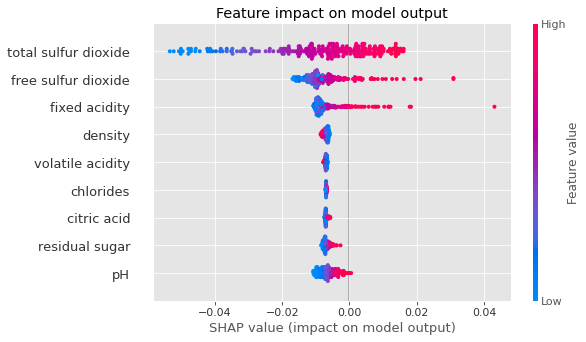

In [27]:
# Extract Shapley values from the explainer
# Select test data representing red wine category
shap_values = explainer.shap_values(X_test_frame[:400])

# Summarize the Shapley values in a plot
plt.title('Feature impact on model output')
shap.summary_plot(shap_values[0][:,:-2], X_test_frame[:400].iloc[:,:-2][:400],max_display=30, show=False)